### Package import

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling
from pandas_profiling import ProfileReport

# Task 1 - Analysis Pipeline

In [2]:
raw_data = pd.read_csv("C:/Users/cltom/OneDrive/Documents/COSC301/survey.csv")
raw_data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


**Research question:** Is there a correlation between the number of employees in a company and how open employees are to discuss mental health?


**Relevant variables:**
- no_employees: How many employees does your company or organization have? (6 possible answers)
- mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequence? (3 possible answers)
- coworkers: Would you be willing to discuss a mental health issue with your coworker? (3 possible answers)
- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor? (3 possible answers)
    

### Removing unecessary columns

In [3]:
data= raw_data[["no_employees", "mental_health_consequence", "coworkers", "supervisor"]]
data.head()

,no_employees,mental_health_consequence,coworkers,supervisor
0,6-25,No,Some of them,Yes
1,More than 1000,Maybe,No,No
2,6-25,No,Yes,Yes
3,26-100,Yes,Some of them,No
4,100-500,No,Some of them,Yes


### Checking for incorrect data

In [4]:
data.describe()

,no_employees,mental_health_consequence,coworkers,supervisor
count,1259,1259,1259,1259
unique,6,3,3,3
top,6-25,No,Some of them,Yes
freq,290,490,774,516


- "unique" shows that there isn't any incorrect data as the number of unique inputs in the dataframe matches the number of possible answers.

### Checking for missing values (NaN)

In [5]:
if data.isnull().values.any() == True:
    print("Number of missing values:", len(data[data.isnull()]))
else:
    print("No missing values found.")

No missing values found.


### Checking for duplicated entries

In [6]:
if len(data[data.duplicated()])>0:
    print("Number of duplicated entries:", len(data[data.duplicated()]))
else:
    print("No duplicated entries found")

Number of duplicated entries: 1130


- Since the data was collected as a survey with limited answer choices, the high number of duplicated entries is acceptable and thy do not need to be removed.

# Task 2 - Method Chaining

### Step1: 

In [7]:
# Changing column names
df1 = data.rename(columns= {'no_employees':'employees', 'mental_health_consequence':'consequence'})
print(df1.head())

# Defining variables
noe1 = df1["employees"]
mhc1 = df1["consequence"]
co1 = df1["coworkers"]
up1 = df1["supervisor"]

noe_q1 = "How many employees does your company or organization have?"
mhc_q1 = "Do you think that discussing a mental health issue with your employer would have negative consequence?"
co_q1 = "Would you be willing to discuss a mental health issue with your coworker?"
sup_q1 = "Would you be willing to discuss a mental health issue with your direct supervisor?"


        employees consequence     coworkers supervisor
0            6-25          No  Some of them        Yes
1  More than 1000       Maybe            No         No
2            6-25          No           Yes        Yes
3          26-100         Yes  Some of them         No
4         100-500          No  Some of them        Yes



- I added "1" to every variable to make sure that Step 2 works properly.

### Step2:

In [12]:
def load_and_process_ct(csv_file):
    df_raw= (
        pd.read_csv(csv_file)
        .rename(columns= {'no_employees':'employees', 'mental_health_consequence':'consequence'}))
    global df
    df= df_raw[["employees", "consequence", "coworkers", "supervisor"]]
    
    global noe, mhc, co, sup
    noe = df["employees"]
    mhc = df["consequence"]
    co = df["coworkers"]
    sup = df["supervisor"]

    global noe_q, mhc_q, co_q, sup_q
    noe_q = "How many employees does your company or organization have?"
    mhc_q = "Do you think that discussing a mental health issue with your employer would have negative consequence?"
    co_q = "Would you be willing to discuss a mental health issue with your coworker?"
    sup_q = "Would you be willing to discuss a mental health issue with your direct supervisor?"
    
    return df

In [13]:
load_and_process_ct("C:/Users/cltom/OneDrive/Documents/COSC301/survey.csv")

,employees,consequence,coworkers,supervisor
0,6-25,No,Some of them,Yes
1,More than 1000,Maybe,No,No
2,6-25,No,Yes,Yes
3,26-100,Yes,Some of them,No
4,100-500,No,Some of them,Yes
...,...,...,...,...
1254,26-100,No,Some of them,Some of them
1255,26-100,No,Some of them,Yes
1256,More than 1000,Yes,No,No
1257,100-500,Yes,No,No


In [10]:
df.head()

,employees,consequence,coworkers,supervisor
0,6-25,No,Some of them,Yes
1,More than 1000,Maybe,No,No
2,6-25,No,Yes,Yes
3,26-100,Yes,Some of them,No
4,100-500,No,Some of them,Yes


### Step3:

In [2]:
from scripts import project_functions

project_functions.load_and_process_ct("C:/Users/cltom/OneDrive/Documents/COSC301/survey.csv")

,employees,consequence,coworkers,supervisor
0,6-25,No,Some of them,Yes
1,More than 1000,Maybe,No,No
2,6-25,No,Yes,Yes
3,26-100,Yes,Some of them,No
4,100-500,No,Some of them,Yes
...,...,...,...,...
1254,26-100,No,Some of them,Some of them
1255,26-100,No,Some of them,Yes
1256,More than 1000,Yes,No,No
1257,100-500,Yes,No,No


# Task 3 - Exploratory Data Analysis + Method Chaning

In [11]:
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Exploring "no_employees"

In [12]:
noe.value_counts().rename_axis('Number of employees').reset_index(name= 'Counts')

,Number of employees,Counts
0,6-25,290
1,26-100,289
2,More than 1000,282
3,100-500,176
4,1-5,162
5,500-1000,60


[Text(0.5, 0, 'Number of employees'),
 Text(0, 0.5, 'Count of answers'),
 Text(0.5, 1.0, 'no_employees')]

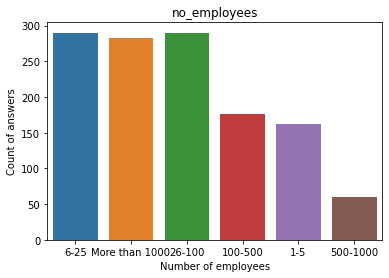

In [13]:
sns.countplot(x= noe).set(xlabel= "Number of employees", ylabel= "Count of answers", title= "no_employees")

- Although company's size entries are not uniform across the survey, the data frame has a decent sample size of each number of employees.

### Exploring "mental_health_consequence"

In [14]:
print("Question:", mhc_q)

mhc.value_counts().rename_axis('Answer').reset_index(name= 'Counts')

Question: Do you think that discussing a mental health issue with your employer would have negative consequence?


,Answer,Counts
0,No,490
1,Maybe,477
2,Yes,292


[Text(0.5, 0, 'Answer'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'mental_health_consequence')]

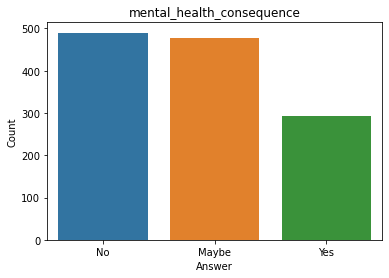

In [15]:
sns.countplot(x= mhc).set(xlabel= "Answer", ylabel= "Count", title= "mental_health_consequence")

- The majority believes that discussing mental health issues with supervisors does not bring negative consequences. However, a high number of responders are not confident about the consequences and answered "Maybe". In one perspective, "Maybe" can indicate a lack of discussion about mental health in a company, especially among employees and supervisors, since workers are not sure what kind of reaction such matter can cause.
- The answer "Yes" has a considerable frequency, even if lower than "No" and "Maybe"

### Exploring "coworkers"

In [16]:
print("Question:", co_q)

co.value_counts().rename_axis('Answer').reset_index(name= 'Counts')

Question: Would you be willing to discuss a mental health issue with your coworker?


,Answer,Counts
0,Some of them,774
1,No,260
2,Yes,225


[Text(0.5, 0, 'Answer'), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'coworkers')]

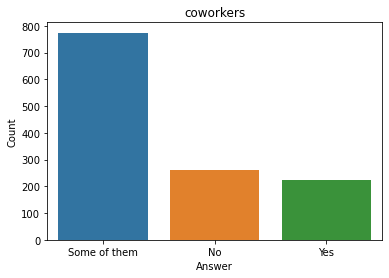

In [17]:
sns.countplot(x= co).set(xlabel= "Answer", ylabel= "Count", title= "coworkers")

- The majority of responders feel somewhat confortable with discussing mental health with coworkers. 
- There are fewer people opened to talk about mental health with any coworker than people that are not opened to talk about mental health with anyone.

### Exploring "supervisor"

In [18]:
print("Question:", sup_q)

sup.value_counts().rename_axis('Answer').reset_index(name= 'Counts')

Question: Would you be willing to discuss a mental health issue with your direct supervisor?


,Answer,Counts
0,Yes,516
1,No,393
2,Some of them,350


[Text(0.5, 0, 'Answer'), Text(0, 0.5, 'Count'), Text(0.5, 1.0, 'supervisor')]

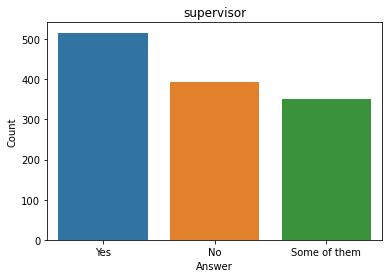

In [19]:
sns.countplot(x= sup).set(xlabel= "Answer", ylabel= "Count", title= "supervisor")

- Most interviewees are willing to discuss mental health issues with supervisor.
- Interestingly, there are more people open to discuss mental health with any supervisor than to some. This data can draw many hypothesis and research questions. For example, "Does employees think that talking about mental health with supervisors can bring benefits?", and "Is openess about mental health discussion an indicator of intimacy between people in a workplace?".
- On the other hand, a huge portion is not open to discuss mental health issues with supervisors.

## Function count_table

In [14]:
def count_table_ct(variable_name):
    variable = eval(variable_name)
    
    if variable_name == "noe":
        q = noe_q
        ind = ['1', '2', '5', '3', '0', '4']
    elif variable_name == "mhc":
        q = mhc_q
        ind = ['1', '2', '0']
    elif variable_name == "co":
        q = co_q
        ind = ['2', '1', '0']
    else:
        q = sup_q
        ind = ['0', '1', '2']
    
    print("Question:", q)
    
    variable_count1= variable.value_counts().rename_axis('Answer').reset_index(name= 'Counts')
    variable_count2= variable_count1.set_index(pd.Index(ind)).sort_index()
    total= variable_count2.apply(np.sum)
    total['Answer']= 'Total'
    variable_count= variable_count2.append(pd.DataFrame(total.values, index= total.keys()).T, ignore_index= True)
    return variable_count

### Testing function + observations:

In [15]:
count_table_ct("noe")

Question: How many employees does your company or organization have?


,Answer,Counts
0,1-5,162
1,6-25,290
2,26-100,289
3,100-500,176
4,500-1000,60
5,More than 1000,282
6,Total,1259


- 12.9% of responses are "1-5",
- 23% are "6-25", 
- 22.9% are "26-100", 
- 14% are "100-500",
- 4.8% are "500-1000",
- 22.4% are "More than 1000". 

In [419]:
count_table_ct("mhc")

Question: Do you think that discussing a mental health issue with your employer would have negative consequence?


,Answer,Counts
0,Yes,292
1,No,490
2,Maybe,477
3,Total,1259


- 23.2% of responses are "Yes",
- 38.9% are "No",
- 37.9% are "Maybe".

In [41]:
count_table_ct("co")

Question: Would you be willing to discuss a mental health issue with your coworker?


,Answer,Counts
0,Yes,225
1,No,260
2,Some of them,774
3,Total,1259


- 17.9% of responses are "Yes",
- 20.6% are "No",
- 61.5% are "Some of them".

In [42]:
count_table_ct("sup")

Question: Would you be willing to discuss a mental health issue with your direct supervisor?


,Answer,Counts
0,Yes,516
1,No,393
2,Some of them,350
3,Total,1259


- 41% of responses are "Yes",
- 31.2% are "No",
- 27.8% are "Some of them".


## Function count_plot

In [43]:
def count_plot_ct(variable_name):
    variable= eval(variable_name)
    
    if variable_name == "noe":
        plt.figure(figsize= (10,6))
        title= noe_q
        order= ("1-5", "6-25", "26-100", "100-500", "500-1000", "More than 1000")
        plt.ylim(0,400)
    
    elif variable_name == "mhc":
        plt.figure(figsize= (8,5))
        title= mhc_q
        order= ("Yes", "No", "Maybe")
        plt.ylim(0,600)
   
    elif variable_name == "co":
        plt.figure(figsize= (8,5))
        title= co_q
        order= ("Yes", "No", "Some of them")
        plt.ylim(0,900)
    
    else:
        plt.figure(figsize= (8,5))
        title= sup_q
        order= ("Yes", "No", "Some of them")
        plt.ylim(0,650)
        
    variable_countplot= sns.countplot(x= variable, order= order)
    variable_countplot.set(xlabel= "Answer", ylabel= "Count", title= title)
    for p in variable_countplot.patches:
        variable_countplot.annotate('count = {:}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### Testing function:

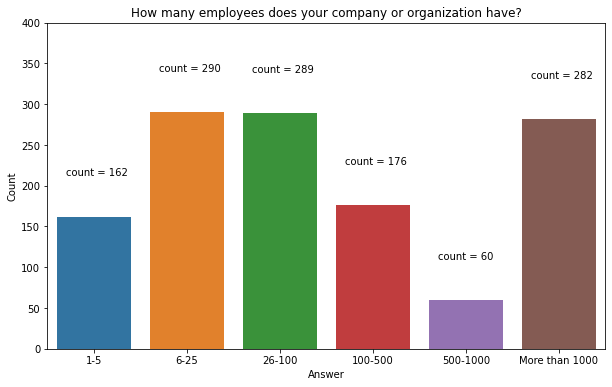

In [44]:
count_plot_ct("noe")

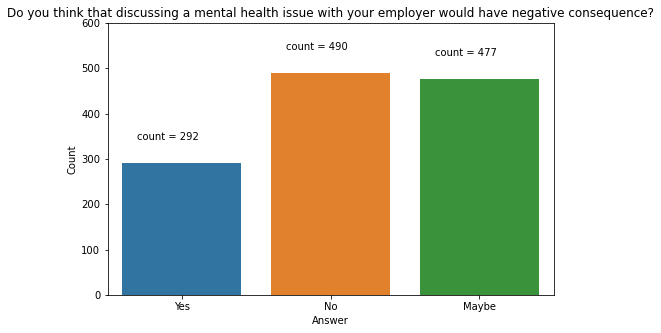

In [45]:
count_plot_ct("mhc")

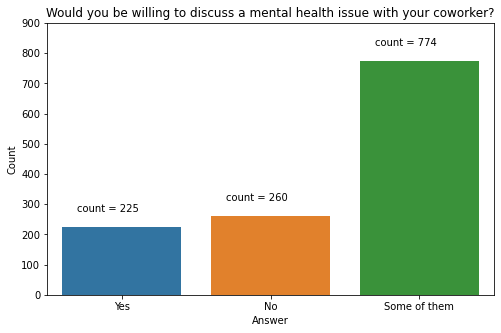

In [46]:
count_plot_ct("co")

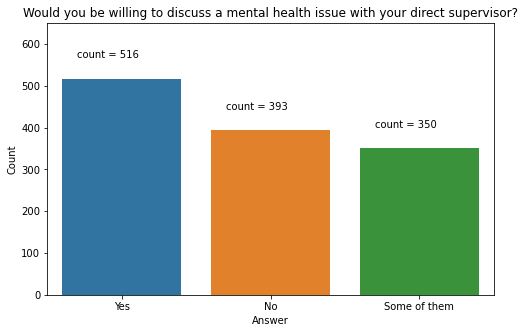

In [47]:
count_plot_ct("sup")

### Function groupby_noe


In [439]:
def groupby_noe_ct(variable1, variable2):
    
    if variable1 == "consequence":
        ind= [2,0,1]
        indx= [2,1,0,14,13,12,8,7,6,5,4,3,11,10,9,17,16,15]
        variable1_new= 'Mental health consequence:'
        variable2_new= 'Supervisor:'
    elif variable1 == "coworkers":
        ind= [2,0,1]
        indx= [2,0,1,11,9,10,8,6,7,14,12,13,5,3,4,17,15,16]
        variable1_new= 'Coworkers:'
        variable2_new= 'Supervisor:'
    elif variable1 == "supervisor" and variable2 == "consequence":
        ind= [2,1,0]
        indx= [2,0,1,11,9,10,8,6,7,14,12,13,5,3,4,17,15,16]
        variable1_new= "Supervisor:"
        variable2_new= "Mental health consequence:"
    else:
        ind= [2,0,1]
        indx= [2,1,0,14,13,12,8,7,6,5,4,3,11,10,9,17,16,15]
        variable1_new= 'Supervisor:'
        variable2_new= 'Coworkers:'
    
    # Grouping and Cleaning
    df_noe= pd.DataFrame({'':df.groupby(["employees", variable1, variable2]).size()}).unstack().replace(np.nan, 0)

    # Reordering columns
    cols= df_noe.columns.tolist() 
    cols= [cols[i] for i in ind]
    df_noe= df_noe[cols]

    # Reordering index
    df_noe= df_noe.iloc[indx]

    # Formatting
    df_noe= df_noe.rename_axis(index={'employees':'Number of employees:', variable1:variable1_new}, 
                               columns={variable2:variable2_new})
    df_noe= (df_noe.style.set_properties(subset= df_noe.columns, **{'width':'7em', 'text-align':'center'})
                    .set_table_styles([dict(selector= 'th', props= [('text-align', 'left')])]).format('{0:,.0f}'))
    return df_noe

# Task 4 - Focused Analysis

**Research question:** Is there a correlation between the number of employees in a company and how open employees are to discuss mental health?

**Hypothesis:**
    I predict that employees are less willing to discuss mental health in the workplace as the number of employees in a company increases. This is because the relations between coworkers, and workers and supervisors are more distant amd superficial in big companies.

### Analysis plan

1. Compare mental health consequence variable with the number of employees along with supervisor variable.
  
Goal: observe the employees' expectations across companies (with different sizes) when discussing a mental health issue with employers, and if the fear of a negative consequence impact their willingness to talk about mental health with supervisors.
  
2. Compare supervisor variable with the number of employees along with coworkers variable.
  
Goal: observe if employees are more open to talk about mental health with coworkers than with supervisors, and how this openess change across companies with different number of employees.


### 1. Number of employees vs. Mental health consequence vs. Supervisor

In [435]:
groupby_noe_ct("consequence", "supervisor")

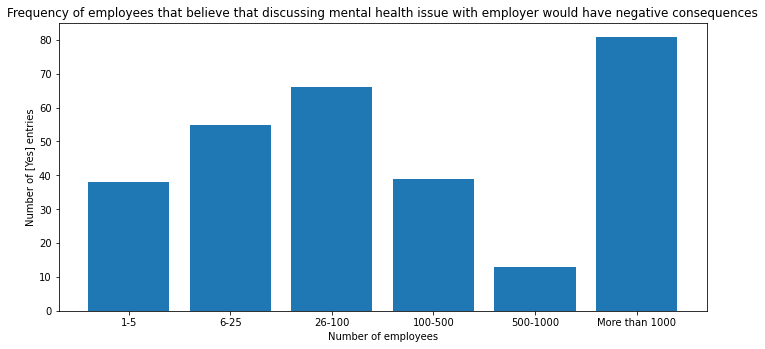

In [485]:
df_noe1= pd.DataFrame({'count':df.groupby(["employees", "consequence"]).size()}).iloc[[2,14,8,5,11,17]]

x= ['1-5','6-25', '26-100', '100-500', '500-1000', 'More than 1000']
ax= plt.figure(figsize= (9,4)).add_axes([0,0,1,1])
noe_mhc_plot= ax.bar(x, df_noe1["count"])
ax.set(xlabel= "Number of employees", ylabel= "Number of [Yes] entries", 
       title= "Frequency of employees that believe that discussing mental health issue with employer would have negative consequences")
        
plt.show()

- Out of 292 "Yes" entries, 81 (27.7%) came from workers of tech companies that have more than 1000 employees. 
- 13% were from workers in companies with 1-5 employees, 18.8% 6-25 employees, 22.6% were 26-100 employees, 13.4% 100-500 employees, 4.5% 500-1000 employees, and 27.7% in companies with more than 1000 employees.
- Concrete conclusions cannot be drawn solely from this plot as the sample size differ across companies sizes.

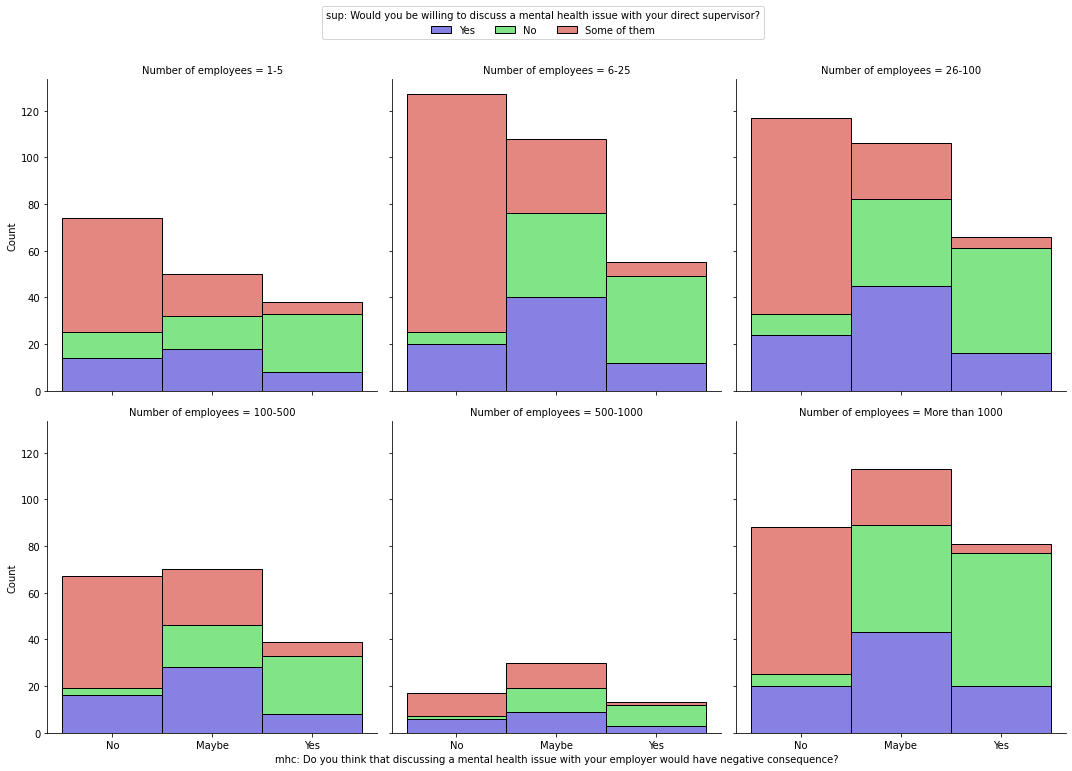

In [543]:
df1= df.rename(columns= {'employees':'Number of employees'}) # Changed the name so graph displays "Number of employees" instead of "employees"


grouped_plot2= sns.displot(x= "consequence", hue= "supervisor", col= "Number of employees", col_wrap= 3, data= df1, 
                   col_order= ('1-5','6-25','26-100', '100-500', '500-1000', 'More than 1000'), multiple= 'stack', legend= False, palette= "hls")

plt.legend(title= f"sup: {sup_q}", bbox_to_anchor=(0.1, 2.35), ncol= 3, labels= ["Yes", "No", "Some of them"])

axes = grouped_plot2.axes.flatten() 
axes[3].set_xlabel(" ")
axes[4].set_xlabel(f"mhc: {mhc_q}")
axes[5].set_xlabel(" ")

plt.show()

If small companies have less than 100 employees and big companies have more than 100, the data demostrates that employees from small tech companies are more confident that discussing a mental health issue with employers do not have negative consequences than employees from big tech companies. Alhtough "Maybe" is not equivalent to "Yes", both answers points to similar conclusions, which the responder would not be open to talk about a mental health issue with employer since they believe (certainly or not) that it could have negative consequences.

When comparing with the question: "Would you be willing to discuss a mental health issue with your direct supervisor?", it is conclusive that people that believe that mental health discussion with employers can have negative consequences are less likely to be willing to have the same disussion with direct supervisors. On the other hand, people that think that discussing a mental health issue with employers does not have negative consequences are more likely to be willing to discuss a mental health issue with some direct supervisors.

### 2. Number of employees vs. Supervisor vs. Coworkers

In [440]:
groupby_noe("supervisor", "coworkers")

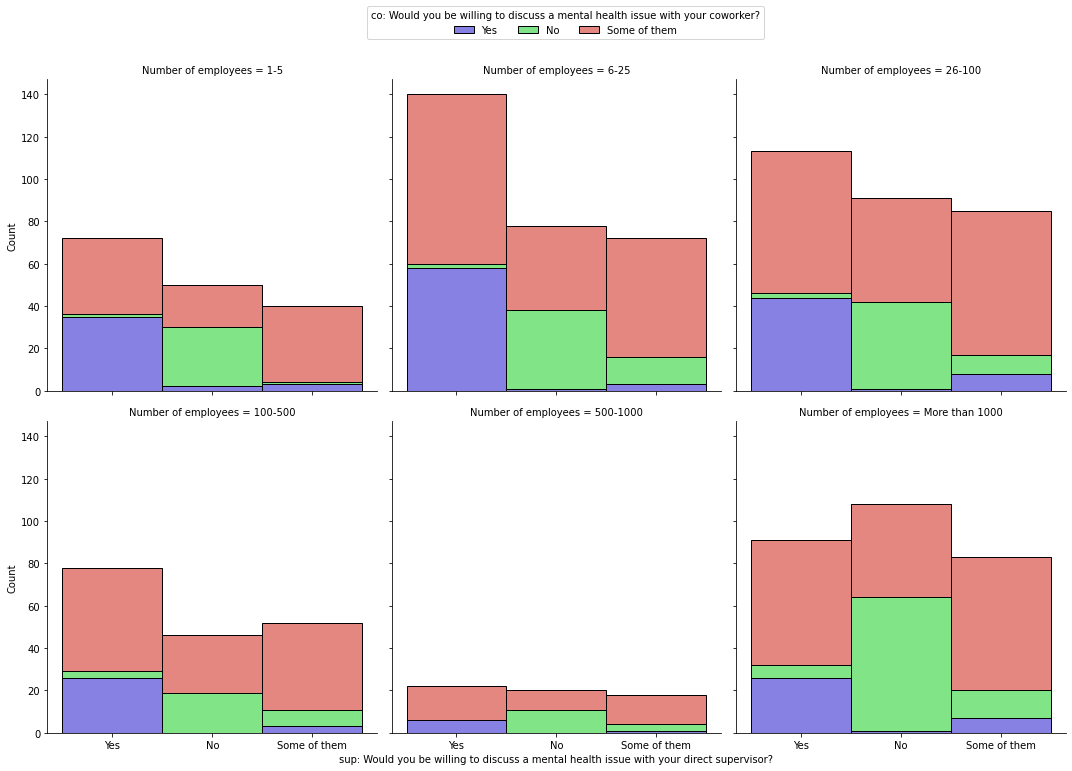

In [531]:
grouped_plot2= sns.displot(x= "supervisor", hue= "coworkers", col= "Number of employees", col_wrap= 3, data= df1, 
                   col_order= ('1-5','6-25','26-100', '100-500', '500-1000', 'More than 1000'), multiple= 'stack', legend= False, palette= "hls")

plt.legend(title= f"co: {co_q}", bbox_to_anchor=(0.1, 2.35), ncol= 3, labels= ["Yes", "No", "Some of them"])

axes = grouped_plot2.axes.flatten() 
axes[3].set_xlabel(" ")
axes[4].set_xlabel(f"sup: {sup_q}")
axes[5].set_xlabel(" ")

plt.show()

Looking at the count of the supervisor column, the number of employees that are willing to discuss mental health issue with any direct supervisor is higher in organizations with less than 500 employees. On the other hand, the number of "No" answers outstand "Yes" and "Some of them" in companies with more than 500 employees. Even though "Yes" and "Some of them" are segregated in the plot, logically, they can both be interpreted as employees being open to discuss mental health. However, the plot shows that small companies have a significant higher "Yes" frequency than "Some of them". This may suggest that all the relationships in small organizations are more intimal or open as employees are willing to talk about mental health with any supervisor. 

When comparing the supervisor variable with the coworker variable, it is observed that employees that are open to have a discussion with any direct supervisor are also open to have a discussion with any or some coworkers. The frequency of people that are willing to talk about mental health with supervisors but not with coworkers is generally low. Nonetheless, the frequency is a little bit higher in big companies. Employees that would not talk about mental health with supervisors would either not talk to any coworker or would talk to some of them for every company size. Overall, the employee likelihood of being open to discuss a mental issue with the direct supervisor and coworkers (the intersection between supervisor and coworker variable) is not interfered by the number of employees.

## Conclusion

**Research question:** Is there a correlation between the number of employees in a company and how open employees are to discuss mental health?

- Employees are more confident that discussing a mental health issue with employers do not have negative consequences in organizations with less than 100 employees.
- Employees that believe that mental health discussion with employers can have negative consequences are less likely to be willing to have the same disussion with direct supervisors.
- Employees are more whilling to discuss mental health issue with any direct supervisor in companies with less than 500 employees.
- Employees that are whilling to discuss a mental health issue with any of their direct supervisor are also whilling to have he same discussion with any coworker or some of them. 
- Based the openess for mental health discussion on the three variables, the analysis shows a negative correlation between the number of employees in a company and how open wmployees are to discuss mental health. The likelihood of an employee to be open to discuss mental health decreases as the comapny size increases.